# Deep Learning Tutorial

Deep Learning Tutorial based on https://spandan-madan.github.io/DeepLearningProject/.

Credits: [Spandan Madan](http://people.csail.mit.edu/smadan/web/).

## Imports

* In this section we import required packages.
* We can install these packages using the notebook itself.

In [1]:
# Inline figures
%matplotlib inline

In [2]:
# Installing Python packages from the notebook
import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} urllib2 # did not work cause of Python 2
# Change to python 3 by using urllib instead
#!{sys.executable} -m pip install urllib2 # did not work cause of Python 2
#!conda install -c conda-forge --yes --prefix {sys.prefix} wget # did not work
#!{sys.executable} -m pip install wget # worked
#!{sys.executable} -m pip install imdb # did not work
#!{sys.executable} -m pip install IMDbPY # worked

Based on [Jake Van Der Plas](http://jakevdp.github.io) blog post on [Installing Python packages on a Jupyter Notebook](http://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/).

In [3]:
# Web access packages
import urllib
import requests
import wget

# Utilities packages
import itertools
import time
import os
import json
import logging

# Movies database API packages
import imdb 
import tmdbsimple as tmdb


import numpy as np
import random as rd

# Figure and style packages
import matplotlib.pyplot as plt
import seaborn as sns

# Object serialization package
import pickle

# Custom utility functions 
from dltutorial.utils import get_movie_id_tmdb
from dltutorial.utils import get_movie_info_tmdb
from dltutorial.utils import get_movie_genres_tmdb
from dltutorial.utils import get_api_key_tmdb

from dltutorial.utils import get_movie_info_imdb
from dltutorial.utils import get_movie_genres_imdb

## Style

In [4]:
plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(9, 6)})

## Logging

* Here we instanciate a logging object to record our logs.

In [5]:
logging.basicConfig(filename="./dltutorial/logs/dev_logs.txt",
                    level=logging.INFO,
                    format=' %(asctime)s - %(funcName)s -'
                    '%(levelname)s - %(message)s')

## Utility functions

* You may want to create a private Python module containing only an ``__init__.py`` file that consists in a string variable ``API_KEY`` that is your private API key from [TMDB](https://www.themoviedb.org/). Else you can instanciate the ``api_key`` directly in your notebook but do not share it!

* Custom utility functions have been implemented in ``dltutorial.utils``.

* We create a folder where we store the scrapped movie posters.

In [6]:
logging.info('Setting posters storage folder...')

# Create a data folder
data_folder = 'data/'
# Poster sub-folder inside data folder
poster_folder = 'posters/'
# Python package main folder
main_folder = './dltutorial/'
complete_path = main_folder  + data_folder + poster_folder

if data_folder.split('/')[0] in os.listdir(main_folder):
    logging.debug('%s in root directory...'
                  % data_folder)
    if poster_folder.split('/')[0] in os.listdir(main_folder + data_folder):
        logging.debug('%s in %s folder...' %(
            poster_folder, data_folder))
        print('%s folder already exists.' % complete_path)
    else:
        logging.debug('%s not in %s folder.'
                      'Creating relevant %s folder...' %
                     (poster_folder, data_folder, poster_folder))
        os.mkdir(complete_path)
else:
    logging.debug('%s not in root directory. Creating relevant folders...'
                 % data_folder)
    os.mkdir(main_folder + data_folder)
    os.mkdir(complete_path)

./dltutorial/data/posters/ folder already exists.


## Some examples

### TMDB

In [7]:
logging.info('Setting TMDB API key...')
if 'private' in os.listdir(main_folder): #
    logging.debug('Private folder exists...')
    from dltutorial import private
    api_key = private.API_KEY
else:
    logging.debug('No private folder found...')
    print('There is no private folder.'
          'API key will remain blank if you do not set it.')
    api_key = '' # put your own API key but do not share it
# Set the TMDB API key
tmdb.API_KEY = api_key 
logging.debug('TMDB API key is set to %s...' % api_key)

# Instanciate a search object from TMDB
search_tmdb = tmdb.Search()

# Some examples
movie_name = "The Matrix"

movie_id = get_movie_id_tmdb(movie_name=movie_name, search_tmdb=search_tmdb)
print("%s has id %s\n" % (movie_name, movie_id))
movie_info = get_movie_info_tmdb(movie_name=movie_name, search_tmdb=search_tmdb)
print("%s has these info categories:\n %s\n" % (movie_name, movie_info.keys()))
movie_genres = get_movie_genres_tmdb(movie_name=movie_name, search_tmdb=search_tmdb)
print("%s belongs to these genres:\n %s\n" % (movie_name, movie_genres))

The Matrix has id 603

The Matrix has these info categories:
 dict_keys(['revenue', 'vote_average', 'overview', 'title', 'backdrop_path', 'genres', 'tagline', 'spoken_languages', 'poster_path', 'runtime', 'popularity', 'budget', 'video', 'original_language', 'production_companies', 'imdb_id', 'id', 'release_date', 'original_title', 'adult', 'homepage', 'vote_count', 'belongs_to_collection', 'production_countries', 'status'])

The Matrix belongs to these genres:
 [{'name': 'Action', 'id': 28}, {'name': 'Science Fiction', 'id': 878}]



### IMDB

In [8]:
movie_name = "The Matrix"
search_imdb = imdb.IMDb()

movie_genres = get_movie_genres_imdb(movie_name=movie_name, search_imdb=search_imdb)
print("%s movie belongs to genres:\n %s \n" % (movie_name, movie_genres))
movie_info = get_movie_info_imdb(movie_name=movie_name, search_imdb=search_imdb)
print("%s movie first 10 info categories:\n %s \n" % (movie_name, movie_info.keys()[:10]))

The Matrix movie belongs to genres:
 ['Action', 'Sci-Fi'] 

The Matrix movie first 10 info categories:
 ['synopsis', 'cinematographer', 'plot', 'plot outline', 'cover url', 'casting director', 'title', 'runtimes', 'camera and electrical department', 'year'] 



## Multiple movies

#### Top 20 from TMDB

In [9]:
# Top 20 popular films
top_movies = tmdb.Movies().popular()['results']
# Create a TMDB genre object
genres = tmdb.Genres()
# Returns the genres list (ID/name)
genres_list = genres.movie_list()['genres']
# Create a genres dictionary
genres_dict = dict()
for genre in genres_list:
    genres_dict[genre['id']] = genre['name']
# Print the genres of top 5 movies
for movie in top_movies[:5]:
    genre_ids = movie['genre_ids']
    genre_names = list()
    for genre_id in genre_ids: 
        genre_names.append(genres_dict[genre_id])
    print("%s\n%s\n" % (movie['title'], genre_names))

Fifty Shades Freed
['Drama', 'Romance']

Zootopia
['Animation', 'Adventure', 'Family', 'Comedy']

Coco
['Adventure', 'Comedy', 'Family', 'Animation']

Ready Player One
['Adventure', 'Science Fiction', 'Action']

Black Panther
['Action', 'Adventure', 'Fantasy', 'Science Fiction']



#### Top 1000 movies from TMDB

In [10]:
movie_list_file = './dltutorial/data/tmdb_movie_list.pckl'

if not os.path.exists(movie_list_file):
    # Instantiate TMDB movies object
    all_movies = tmdb.Movies()
    # Instantiate empty list of movies to populate
    top1000_movies = list()
    # Number of pages to download
    n_pages = 50
    logging.debug("Downloading movie list from top %s pages..." % n_pages)
    for i in range(1, n_pages + 1):
        if i%10 == 0:
            msg = "%s out of %s movie pages downloaded (%s%%)..." % (i, n_pages, round(100 * i / n_pages, 1))
            print(msg)
            logging.debug(msg)
            time.sleep(5)
        current_page_movies = all_movies.popular(page=i)['results']
        top1000_movies.extend(current_page_movies)
    # Write binary in data folder in pickle format
    logging.debug("Writing %s movie results on disk..." % (len(top1000_movies)))
    with open(file=movie_list_file, mode='wb') as f:
        pickle.dump(top1000_movies, f)
    logging.debug("Done writing...")
else:
    logging.debug("Loading movies list from disk...")
    with open(file=movie_list_file, mode='rb') as f:
        top1000_movies = pickle.load(f)
    logging.debug("Done loading %s movies" % len(top1000_movies))

## Dealing with unbalanced dataset

Handling the multi-label component. Co-occurrence sheds some information that the dataset has imbalances.

* We want to investigate pairwise genres correlations.
    * First we build every possible pair from the movie genres available.

In [11]:
def list2pairs(input_list):
    """
    Generating all possible pairs of movies
    
    Parameters
    -----------
    - input_list: list
        generic list used to generate pairs
        
    Returns
    -----------
    - pairs: list
        list of pairs (tuples)
    """
    # Build all pairs of length 2 from input_list
    pairs = list(itertools.combinations(input_list, 2))
    # Add duplicate pairs
    pairs.extend([(elt, elt) for elt in input_list])
    return pairs

In [12]:
# Get all genre pairs from top 1000 movies
genre_pairs = list()
for movie in top1000_movies:
    genre_pairs.extend(list2pairs(movie['genre_ids']))
    
# We keep only unique pairs
unique_genres = np.unique(genre_pairs)
# We instantiate a correlation matrix
corr_matrix = np.zeros((len(unique_genres), len(unique_genres)))
for pair in genre_pairs:
    corr_matrix[np.argwhere(unique_genres == pair[0]), np.argwhere(unique_genres == pair[1])] += 1
    # If not duplicate pairs, affect symmetrical coefficient
    if pair[1] != pair[0]:
        corr_matrix[np.argwhere(unique_genres == pair[1]), np.argwhere(unique_genres == pair[0])] += 1
        

assert len(genres_dict.keys()) == corr_matrix.shape[0]
assert len(genres_dict.keys()) == corr_matrix.shape[1]
print("Correlation matrix shape: ", corr_matrix.shape)

AssertionError: 

##### Debugging part: dropping missing genre

In [13]:
len(genres_dict.keys())

19

In [14]:
corr_matrix.shape

(18, 18)

In [15]:
unique_genres

array([   12,    14,    16,    18,    27,    28,    35,    36,    37,
          53,    80,    99,   878,  9648, 10402, 10749, 10751, 10752])

In [16]:
sorted(genres_dict.keys())

[12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10770]

In [17]:
genres_dict[10770]

'TV Movie'

We have no ``'TV Movie'`` movies in our dataset. I suggest dropping the ``'TV Movie'`` key in ``genres_dict``.

In [18]:
genres_dict.pop(10770, None)

'TV Movie'

In [19]:
assert len(genres_dict.keys()) == corr_matrix.shape[0]
assert len(genres_dict.keys()) == corr_matrix.shape[1]
print("Correlation matrix shape: ", corr_matrix.shape)

Correlation matrix shape:  (18, 18)


#### Correlation matrix visualization

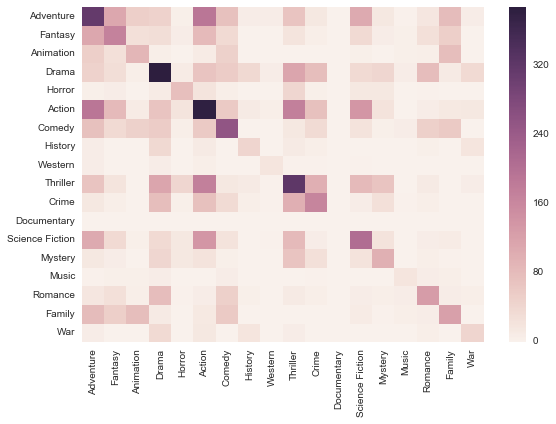

In [20]:
# Return genres names
annotations = [genres_dict[genre_id] for genre_id in unique_genres]
# Display correlation matrix
sns.heatmap(corr_matrix, xticklabels=annotations, yticklabels=annotations);

* Diagonal terms correspond to self-pairs, i.e. the number of times a genre co-occur. That is nothing else than the total times said genre occurred. *We observe that Drama seems to be the most common genre*.

* Additionally we notice that Action often occurs alongside Adventure, Thriller and Mystery.

### Biclustering

In [21]:
from sklearn.cluster import SpectralCoclustering

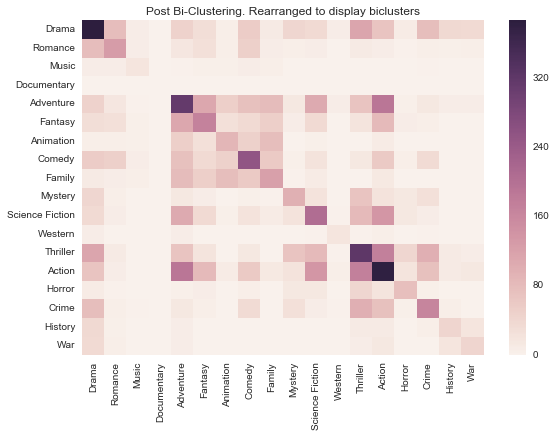

In [24]:
# Instantiate model
model = SpectralCoclustering(n_clusters=5)
# Fit model
model.fit(corr_matrix)

# Rearrange data based on bi-clusters
fit_data = corr_matrix[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# Build rearranged annotations
sorted_annotations = [genres_dict[unique_genres[idx]] for idx in np.argsort(model.row_labels_)]

# Display biclustering aftermath
sns.heatmap(fit_data, xticklabels=sorted_annotations, yticklabels=sorted_annotations)
plt.title("Post Bi-Clustering. Rearranged to display biclusters");

* We see genres are clustered into groups. For instance: *Thriller, Action, Horror and Crime* belong to 1 cluster while *Adventure, Fantasy, Animation, Comedy and Family* belong to another.